## Data Cleaning & Data Preprocessing

### Handling of missing values

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as scs

In [1]:
# importing the dataset

df = pd.read_csv(r"C:\Users\HP\Downloads\employees.csv")

In [2]:
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [3]:
df.describe()

,Salary,Bonus %
count,1000.000000,1000.000000
mean,90662.181000,10.207555
std,32923.693342,5.528481
min,35013.000000,1.015000
25%,62613.000000,5.401750
50%,90428.000000,9.838500
75%,118740.250000,14.838000
max,149908.000000,19.944000


In [4]:
df.isnull().sum()    # measuring the count of missing values in the dataset

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [19]:
df['Gender'].mode()   #detecting the mode of qualitative variable

0    Female
Name: Gender, dtype: object

In [21]:
df['Gender'].fillna('Female',inplace=True)    # replacing gender with mode 'female'

In [22]:
df.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                 43
dtype: int64

In [23]:
df['Team'].mode()

0    Client Services
Name: Team, dtype: object

In [24]:
df['Team'].fillna('Other',inplace=True)

In [25]:
df.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                  0
dtype: int64

In [26]:
df['Senior Management'].fillna('Not Given',inplace=True)

In [27]:
df.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management     0
Team                  0
dtype: int64

### performing iloc 

In [7]:
df_slice = df.iloc[990:996]    #getting a specific record from the dataset

In [8]:
df.dropna(axis = 0, how ='any')

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal
...,...,...,...,...,...,...,...,...
994,George,Male,6/21/2013,5:47 PM,98874,4.479,True,Marketing
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


### Checking for duplicates

In [9]:
df.duplicated().sum()

0

### Checking for outliers

In [10]:
import seaborn as sns

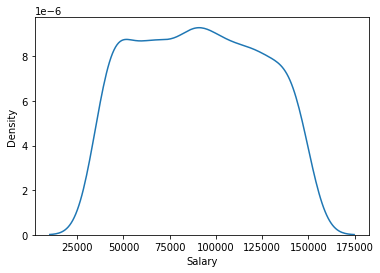

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(df['Salary'])
plt.show()

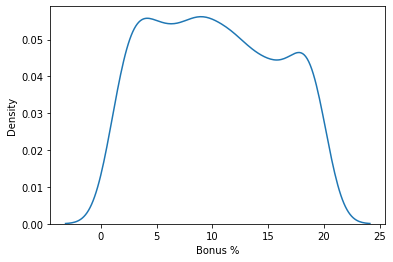

In [48]:
sns.kdeplot(df['Bonus %'])
plt.show()

#### There is no any outliers in the following dataset pertain to numerical variables

## Log Transformation

In [32]:
# Generate 1000 samples from a right-skewed distribution
data = np.random.exponential(scale=2, size=1000)

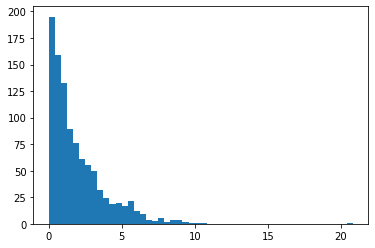

In [37]:
# Plot the data to visualize the skew
import matplotlib.pyplot as plt
plt.hist(data, bins=50)
plt.show()

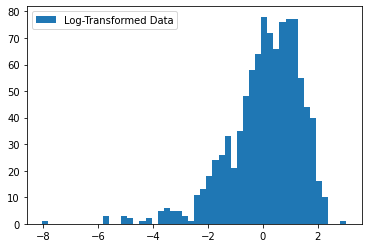

In [38]:
# Apply log transformation to the data
log_data = np.log(data)

# Plot the original data and the log-transformed data
plt.hist(log_data, bins=50, label='Log-Transformed Data')
plt.legend()
plt.show()

## Internally studentized residuals (AKA z-score method)

In [44]:
import scipy
from scipy import stats

z_scores = np.abs(stats.zscore(data))    # taking the absolute values of Z-Scores

threshold = 3

final_data = data[z_scores < threshold]   

<AxesSubplot:ylabel='Density'>

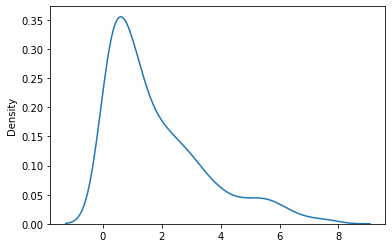

In [45]:
sns.kdeplot(final_data)

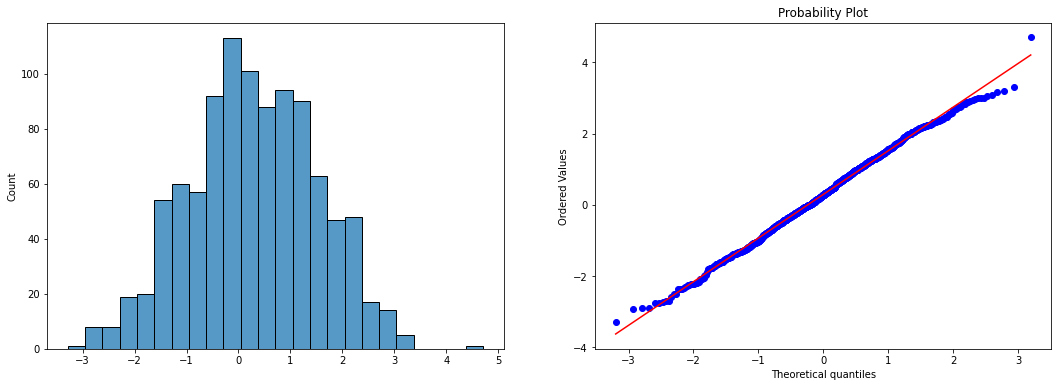

In [54]:
# Transformation Box-Cox
fit_price, lam = scs.boxcox(data)
# Create the plot grid
fig , g = plt.subplots(1,2, figsize=(18,6))

# Histogram
g1 = sns.histplot(fit_price, ax=g[0])

# QQPlot
g2 = scs.probplot(fit_price, dist='norm', plot=plt)